# Identifying Polar and Non-Polar Bonds

Welcome! In this assignment, we will explore the concept of chemical bonding, focusing on how to determine whether a bond is polar or non-polar. Understanding the nature of these bonds is crucial in chemistry as it influences the physical properties and behavior of molecules. We will also delve into identifying the specific bonds that make up different molecules, helping to develop a deeper understanding of molecular structure and its implications on molecular interactions. 

By the end of this assignment, you will be equipped with the knowledge to analyze and classify bonds in various compounds based on their polarity and the types of atomic interactions that hold them together. 

Start by running the cell below to import our neccessary libraries!

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import ipywidgets as widgets
from IPython.display import display
import io
from ipywidgets import interact
import rdkit.Chem.rdCoordGen as rdCoordGen
import py3Dmol as pm
from utils import *

df = pd.read_csv("properties.csv")

def draw_molecules(lst):
    elements = []
    for molecule in lst:
        m = Chem.MolFromSmiles(molecule)
        img = Draw.MolToImage(m)
        img_byte_array = io.BytesIO()
        img.save(img_byte_array, format='PNG')
        img_byte_array.seek(0) 
        elements.append(widgets.Image(value=img_byte_array.read(), format='png')) 
    row = widgets.HBox(elements)
    display(row)

ModuleNotFoundError: No module named 'py3Dmol'

## Section 1: Understanding Molecules

Let's take a look at some molecules to get a better understanding of their compostion. Let's run through an exercise to see how we can use visualizations to get a better understanding of chemical reactions. 

We will start with *ethanol*. Using a python library called rdkit, we can visualize the molecule easily below.  

In [3]:
draw_molecules(['CCO'])

We can transition Ethanol to Acetic Acid by *oxiding the ethanol.* Ethanol undergoes oxidation when exposed to an oxidizing agent. 

First, Ethanol (C₂H₅OH) is oxidized to acetaldehyde (CH₃CHO) by an oxidizing agent such as potassium dichromate (K₂Cr₂O₇) or any mild oxidizer. In this step, ethanol loses two electrons and one hydrogen atom (oxidized), forming acetaldehyde.

Second step: Acetaldehyde (CH₃CHO) is further oxidized to acetic acid (CH₃COOH). This is typically achieved by further oxidation using stronger oxidizers.

C₂H₅OH → CH₃CHO → CH₃COOH

This means that to go from ethanol to acetic acid, you must perform two stages of oxidation: one to form acetaldehyde and another to convert it to acetic acid.

Run the cell below to see the transition. 

In [6]:
draw_molecules(['CCO', 'C=O', 'CC(=O)O'])

**Question 1.1:** How many hydrogen bonds are in Ethanol?

In [8]:
widgets.Dropdown(options=['0', '1', '2', '3', '4'])

Dropdown(options=('0', '1', '2', '3', '4'), value='0')

**Question 1.2:** How many hydrogen bonds are in Acetic Acid?

In [9]:
widgets.Dropdown(options=['0', '1', '2', '3', '4'])

Dropdown(options=('0', '1', '2', '3', '4'), value='0')

## Section 2: Building Molecules

We'll start off by understanding how to build the water molecule before getting into some other examples.

Our first step is to build an *instance* of a molecule. We need to do this each time we create a new molecule. Run the cell below to start our H2O molecule.

In [36]:
h2o_molecule = Chem.RWMol()

Now we need to add our atoms! To do this, we need to first create an *instance* of the atom we want to add, then we can add this to our molecule. 

Here's how we add oxygen. 

In [37]:
oxygen = Chem.Atom(8)
oxygen_index = h2o_molecule.AddAtom(oxygen)

We first create an element *instance* by using the function **Chem.Atom** and passing in a number of electrons. Since we are adding oxygen, we passed in 8. Then we added it to our molecule from earlier. 

**Question 2.1:** Use the cell below to add the rest of the atoms needed to build H2O. 

*Hint: Follow the example in the cell above.*

In [38]:
...

...

#answer

hydrogen1 = Chem.Atom(1)
hydrogen1_index = h2o_molecule.AddAtom(hydrogen1)

hydrogen2 = Chem.Atom(1)
hydrogen2_index = h2o_molecule.AddAtom(hydrogen2)

We have our atoms, but none of them are connected! Lets go ahead and add in the bonds we need to complete the molecule. 

**Question 2.2:** Fill in the cell below to visualize our final H2O molecule.

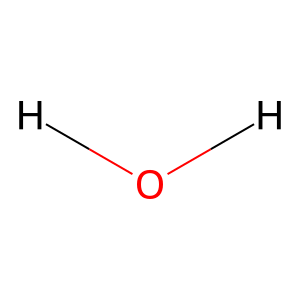

In [39]:
h2o_molecule.AddBond(oxygen_index, hydrogen1_index, Chem.BondType.SINGLE)
#h2o_molecule.AddBond(oxygen_index, ..., ...)
#answer
h2o_molecule.AddBond(oxygen_index, hydrogen2_index, Chem.BondType.SINGLE)


Chem.Draw.MolToImage(h2o_molecule)


Nice job!

**Question 2.3:** Using the example above, fill in the cell below to create a molecule of your choice!

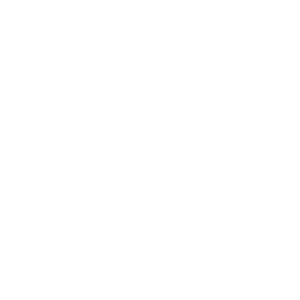

In [40]:
molecule = Chem.RWMol()

# YOUR WORK HERE

Draw.MolToImage(molecule)

## Section 3: Polar and Nonpolar Bonds

[Chemical bonds](https://www.britannica.com/science/chemical-bonding) form the foundation of molecules, determining their shape, interactions, and function in biological and chemical systems. In this module, we will explore two fundamental types of covalent bonds: **polar** bonds and **non-polar** bonds.

### Tug of War

Imagine it’s a scorching summer afternoon and you and your friend are locked in an intense game of tug-of-war. The rope stretches taut between you, perfectly balanced. Neither side is able to overpower the other. Since you both have the same strength and the same determination, for now it’s a fair fight.

If we swap out the rope for electrons and the players for atoms—suddenly, you’re looking at the fundamental nature of covalent chemical bonding.

### Playing Fair


In the case where you are your friend are equally strong, the rope doesn’t move much - if at all. This is exactly what happens in **non-polar** covalent bonds. When two atoms have equal or nearly equal electronegativities, they share electrons perfectly evenly, like two kids politely splitting a sandwich.

Examples of this include:

* O₂ (oxygen gas): Each oxygen atom pulls with the same force, so the electrons are evenly distributed.
* N₂ (nitrogen gas): A similar situation—two nitrogen atoms share electrons equally.
* CH₄ (methane): The carbon and hydrogen atoms have similar electronegativities, so they don’t fight much over electrons.

Since non-polar molecules have no distinct positive or negative sides, they tend to be hydrophobic (water-fearing) and don’t dissolve well in water. Think of how oil and water don’t mix—oil is made of non-polar molecules that refuse to interact with water.

### "Hitting" the Gym

Now imagine that this friend of yours has been hitting the gym, and now their forearms are HUGE. When y'all play tug of war again, they *easily* pull the rope toward themselves, making the game unfair. This kind of scenario also happens in polar covalent bonds, where for specific molecules, one atom is significantly more electronegative than the other, thereby yanking the shared electrons closer.

This uneven sharing creates partial charges:

- The stronger atom (which pulls electrons closer) gets a partial negative charge (δ⁻).
- The weaker atom (which loses some electron density) gets a partial positive charge (δ⁺).
- This is why molecules like water (H₂O) are polar. Oxygen is electronegative and pulls the electrons away from hydrogen, making it slightly negative (δ⁻) and leaving the hydrogens slightly positive (δ⁺).

Some other examples of polar molecules include:

- H₂O (water): The oxygen hogs electrons, making the molecule polar and allowing it to dissolve many substances.
- NH₃ (ammonia): Nitrogen pulls harder on the electrons than hydrogen, making it polar.
- CO (carbon monoxide): Oxygen dominates the electron-sharing, giving carbon a slight positive charge.

Since polar molecules have distinct positive and negative sides, they are hydrophilic (water-loving) and dissolve easily in water. This is why salt and sugar dissolve in water, but oil does not.

### Electronegativity

<div style="text-align: center;">
    <img src="assets/electronegative.png" width="700">
</div>


**Question 1.1** Determine the electronegativity value of gold, and assign that to the value `gold_EN`

In [44]:
gold_EN = ...

#### Electronegativity Difference

The difference in electronegativity (ΔEN) between two bonded atoms determines whether the bond is:
- **Non-Polar Covalent**: Electrons are shared almost equally.
- **Polar Covalent**: Electrons are unequally shared, creating partial charges.
- **Ionic**: One atom completely transfers electrons to another.

The table below summarizes these bond types based on **electronegativity difference ranges** and provides an example for each type.

| **Electronegativity Difference (ΔEN)** | **Bond Type**         | **Example Bond**     | **Explanation** |
|----------------------------------------|-----------------------|----------------------|-----------------|
| 0.0 - 0.4                              | Non-Polar Covalent    | C-H (ΔEN = 0.4)      | Electrons are shared almost equally, no significant charge separation. |
| 0.5 - 1.7                              | Polar Covalent        | O-H (ΔEN = 1.4)      | Electrons are unequally shared, creating partial positive and negative charges. |
| > 1.7                                  | Ionic                 | Na-Cl (ΔEN = 2.1)    | One atom completely transfers electrons to another, forming charged ions. |



**Question 1.2** For each of the following bonds, determine the electronegativity difference and assign that value to the corresponding varibale 
* MgCl₂
* TiO
* S-F
* N-O
* C-S
* Cl-O

In [3]:
Mg_Cl = ...
Ti_O = ...
S_F = ...
N_O = ...
C_S = ...
Cl_O = ...

### 3) Trifluoromethane CHF3

In this next part of the notebook, we will apply what we know about molecular structure, as well as electronegativity difference, in order to classify whether or not the trifluoromethane molecule is polar or nonpolar. 

In order to start first, let us find the electronegativity differences between each of the bonds!

**Question 3.1.** For each of the following bonds in trifluoromethane, determine the electronegativity difference

In [ ]:
# TODO

CH_bond_electronegativity_difference = ...
CF_bond_electronegativity_difference = ...

**Question 3.2.** Based on these electronegativity differences, determine which of the bond(s) in trifluoromethane are polar?

1. Only the C-F bonds
2. Only the C-H bond
3. Both C-H and C-F bonds
4. None of them 

Be sure to set `answer` as a list containing your specific answer choice(s). If you think options 2 and 3 are correct, set `answer` to the list `[2, 3]`. If you think option 1 is correct, set `answer` to `[1]`.

In [2]:
answer = ... #Make sure this is a list! 

Now that we have identified which of the bonds are polar, let's try and determine the molecular shape of trifluoromethane! We will first use Rdkit to accomplish this. 

**Question 3.3.** Fill in the ellipsis below with the atomic number of each element we are trying to add. For example, in the `carbon` assignment statement, we added the atomic number of 6, as Carbon is the sixth element in the periodic table!  

In [25]:
# Create an editable molecule
trifluoromethane = Chem.RWMol()

# Add a carbon atom
carbon = trifluoromethane.AddAtom(Chem.Atom(6))  # Carbon atom

# Add one hydrogen atom
hydrogen = trifluoromethane.AddAtom(Chem.Atom(...)) #SOLUTION

ArgumentError: Python argument types in
    Atom.__init__(Atom, ellipsis)
did not match C++ signature:
    __init__(_object* self, unsigned int num)
    __init__(_object* self, RDKit::Atom other)
    __init__(_object* self, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> what)

In [26]:
# Create an editable molecule
trifluoromethane = Chem.RWMol()

# Add a carbon atom
carbon = trifluoromethane.AddAtom(Chem.Atom(6))  # Carbon atom

# Add one hydrogen atom
hydrogen = trifluoromethane.AddAtom(Chem.Atom(1)) #SOLUTION

**Question 3.4.** We did not add any of the Fluoride atoms to our molecule! Let's go about doing that below. Feel free to look at the code above as inspiration for how to add these atoms to our molecule! 

In [20]:
# Add three fluorine atoms to the trifluoromethane molecule
fluorine1 = ...
fluorine2 = ...
fluorine3 = ...

In [27]:
# Add three fluorine atoms to the trifluoromethane molecule
fluorine1 = trifluoromethane.AddAtom(Chem.Atom(9)) #SOLUTION
fluorine2 = trifluoromethane.AddAtom(Chem.Atom(9)) #SOLUTION
fluorine3 = trifluoromethane.AddAtom(Chem.Atom(9)) #SOLUTION

**Question 3.5.** We have create the scaffolding for our molecule, *now* it is time to start adding the bond types between each atom. We have given you the first Carbon - Fluoride bond for convenience. Add the following bonds between each of the molecules

In [23]:
# Add single bonds between carbon and other atoms
trifluoromethane.AddBond(carbon, hydrogen, ...)
trifluoromethane.AddBond(carbon, fluorine1, Chem.BondType.SINGLE)
trifluoromethane.AddBond(carbon, fluorine2, ...)
trifluoromethane.AddBond(carbon, fluorine3, ...)

ArgumentError: Python argument types in
    RWMol.AddBond(RWMol, int, int, ellipsis)
did not match C++ signature:
    AddBond(RDKit::ReadWriteMol {lvalue} self, unsigned int beginAtomIdx, unsigned int endAtomIdx, RDKit::Bond::BondType order=rdkit.Chem.rdchem.BondType.UNSPECIFIED)

In [28]:
# Add single bonds between carbon and other atoms
trifluoromethane.AddBond(carbon, hydrogen, Chem.BondType.SINGLE)  #SOLUTION
trifluoromethane.AddBond(carbon, fluorine1, Chem.BondType.SINGLE)
trifluoromethane.AddBond(carbon, fluorine2, Chem.BondType.SINGLE) #SOLUTION
trifluoromethane.AddBond(carbon, fluorine3, Chem.BondType.SINGLE) #SOLUTION

4

Now that we have added all of our molecules, let's try using RDkit to go about visualizing this in 2 dimensions. 

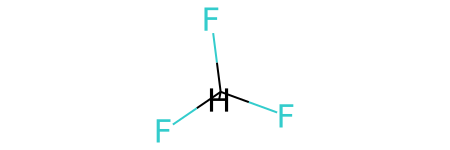

In [29]:
# Convert to a normal molecule object
trifluoromethane = trifluoromethane.GetMol()

# Explicitly compute valence & add hydrogens
Chem.SanitizeMol(trifluoromethane)
trifluoromethane = Chem.AddHs(trifluoromethane)

# Generate 3D coordinates
AllChem.EmbedMolecule(trifluoromethane)

# Display the molecule
trifluoromethane

It's a bit hard to see the shape of this molecule in 2 dimensions. Let's try moving up to 3D! 

**Run the following cell. Do not change any lines**

In [36]:
# Function to convert RDKit molecule to 3D (assuming it's defined)
methane_3d = molecule_to_3d(trifluoromethane)

# Create a 3D viewer
view = pm.view(width=400, height=400)

# Load the molecule data
view.addModel(Chem.MolToMolBlock(methane_3d), "mol")

# Apply enhanced styles
view.setStyle({
    "stick": {"radius": 0.2, "colorscheme": "Jmol"},  # Stick representation with colors
    "sphere": {"scale": 0.5, "colorscheme": "Jmol"},  # Spheres for atoms
})

# Add title label
view.addLabel(
    "Trifluoromethane (CHF3)",  # Title text
    {"position": {"x": 0, "y": 2, "z": 0}, "backgroundColor": "white", "fontColor": "black", "fontSize": 16}
)

# Adjust background and zoom
view.setBackgroundColor("white")
view.zoomTo()

# Show the visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Perfect! We can now see a 3d representation of our molecule! Based on the visualization above, answer the following question:

**Question 3.6.** What molecule shape does trifluoromethane follow? What is the bond angle between each atom? Assign the variable `mol_shape` to one of the integers corresponding to your choice below, and assign `angle` to the angle (in degrees)

1. Trigonal Planar 
2. Trigonal Pyramidal
3. Tetrahedral 
4. Bent
5. T-shaped

In [33]:
mol_shape = 3 #SOLUTION
angle = 109.5 #SOLUTION

**Question 3.7.** Now that we have identified the shape, what is the **polarity** of this molecule? Assign `polar` to the value `True` or `False` corresponding to whether or not you think trifluoromethane is polar! 

In [34]:
polar = ... 

In [35]:
polar = True #SOLUTION

**Question 3.8.** Explain your reasoning in the box below

*Type Your Answer Here*

**Question 3.9.** If you place trifluoromethane in water (H₂O) and hexane (C₆H₁₄), where will it dissolve better? Assign the option of your answer choice to `soluble`

1. Water, because CHF₃ is polar.
2.  Hexane, because CHF₃ is nonpolar.
3.  Neither, because CHF₃ has both polar and nonpolar bonds.
4.  Both, because polarity doesn’t affect solubility.

In [40]:
soluble = ... 

In [41]:
soluble = 1 #SOLUTION

That's the end of this section!

In [2]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  # Use higher quality images for molecules
import py3Dmol

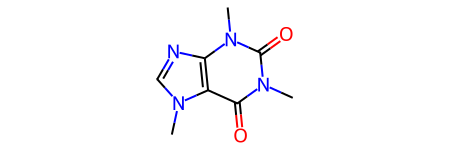

In [12]:
caffeine = Chem.MolFromSmiles("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")
rdCoordGen.AddCoords(caffeine)
caffeine

In [4]:
def molecule_to_3d(molecule):
    mol = Chem.Mol(molecule)
    mol = AllChem.AddHs(mol, addCoords=True)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

## Identifying Polar and Nonpolar bonds

Below is a recap for how to create a `RDkit` molecule

### Water

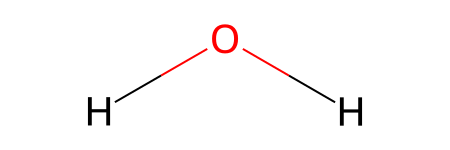

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit.Chem.rdCoordGen as rdCoordGen

# Manually create a water molecule (H2O)
water = Chem.RWMol()  # Create an editable molecule

# Add atoms: Oxygen (atomic number 8) and two Hydrogens (atomic number 1)
oxygen = water.AddAtom(Chem.Atom(8))  # Oxygen atom
hydrogen1 = water.AddAtom(Chem.Atom(1))  # Hydrogen atom
hydrogen2 = water.AddAtom(Chem.Atom(1))  # Another Hydrogen atom

# Add bonds: Oxygen-Hydrogen bonds
water.AddBond(oxygen, hydrogen1, Chem.BondType.SINGLE)
water.AddBond(oxygen, hydrogen2, Chem.BondType.SINGLE)

# Convert to a normal molecule object
water = water.GetMol()

# Explicitly compute valence & add hydrogens
Chem.SanitizeMol(water)
water = Chem.AddHs(water)

# Generate 2D coordinates
rdCoordGen.AddCoords(water)

# Display the molecule
water

In [8]:
water_3d = molecule_to_3d(water)

view = py3Dmol.view(
    data=Chem.MolToMolBlock(water_3d),  # Convert the RDKit molecule for py3Dmol
    style={"stick": {}, "sphere": {"scale": 0.3}}
)
view.zoomTo()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
import ipywidgets as widgets
from IPython.display import display
from rdkit import Chem
from rdkit.Chem import Draw

# Predefined list of common molecules (SMILES format)
molecule_dict = {
    "Methane (CH4)": "C",
    "Water (H2O)": "O",
    "Ethanol (C2H5OH)": "CCO",
    "Acetic Acid (CH3COOH)": "CC(=O)O",
    "Benzene (C6H6)": "c1ccccc1",
    "Trifluoromethane (CHF3)": "FC(F)F"
}

# Dropdown widget for molecule selection
dropdown = widgets.Dropdown(
    options=list(molecule_dict.keys()),
    description="Molecule:"
)

# Text input widget for custom molecule (SMILES input)
text_input = widgets.Text(
    value="",
    placeholder="Enter SMILES string",
    description="SMILES:"
)

# Output widget to display the molecule
output = widgets.Output()

def visualize_molecule(smiles):
    """Generates and displays the molecular structure from a SMILES string."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol)
        return img
    else:
        return None

def on_change(change):
    """Updates the visualization when a molecule is selected or typed."""
    with output:
        output.clear_output()
        smiles = molecule_dict.get(dropdown.value, "") if dropdown.value else text_input.value
        img = visualize_molecule(smiles)
        if img:
            display(img)
        else:
            print("Invalid SMILES string!")

# Attach event listeners
dropdown.observe(on_change, names="value")
text_input.observe(on_change, names="value")

# Display widgets
display(dropdown, text_input, output)

# Trigger initial visualization
on_change(None)

Dropdown(description='Molecule:', options=('Methane (CH4)', 'Water (H2O)', 'Ethanol (C2H5OH)', 'Acetic Acid (C…

Text(value='', description='SMILES:', placeholder='Enter SMILES string')

Output()

### Methane

that looks a bit messy! Let's conver it to 3 dimensions using our previous function

In [42]:
import py3Dmol

# Convert the RDKit molecule to a 3D structure
methane_3d = molecule_to_3d(methane)

# Create a 3D viewer with enhanced coloring and styling
view = py3Dmol.view(width=400, height=400)

# Load the molecule data
view.addModel(Chem.MolToMolBlock(methane_3d), "mol")

# Apply enhanced styles
view.setStyle({
    "stick": {"radius": 0.2, "colorscheme": "Jmol"},  # Stick represenatation with colors
    "sphere": {"scale": 0.5, "colorscheme": "Jmol"},  # Spheres for atoms
})

# Adjust background and zoom
view.setBackgroundColor("white")
view.zoomTo()

# Show the visualizati
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
display_molecule_selector()

Dropdown(description='Molecule:', options=('Water (H2O)', 'Methane (CH4)', 'Ammonia (NH3)', 'Carbon Dioxide (C…

Output()